# Жиделев Сергей
# РИ-401002, ВАРИАНТ 10

In [52]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import numpy.random as rand
import matplotlib.pyplot as plt
import h5py
from statsmodels.tsa import api as tsa
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.arima.model import ARIMA


**3 задание**

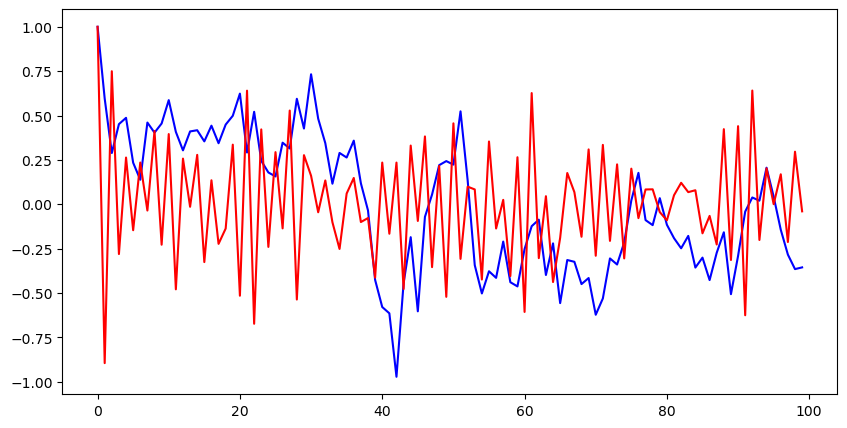

In [53]:
z1 = np.zeros(100)
z2 = np.zeros(100)
z1[0] = 1
z2[0] = 1
for i in range(1,100):
 z1[i] = 0.8 * z1[i - 1] + 0.2 * np.random.randn()
 z2[i] = -0.8 * z2[i - 1] + 0.2 * np.random.randn()
plt.figure(figsize = (10, 5))
plt.plot(z1, 'b')
plt.plot(z2, 'r')
plt.show()

**4 задание**

<Figure size 1000x500 with 0 Axes>

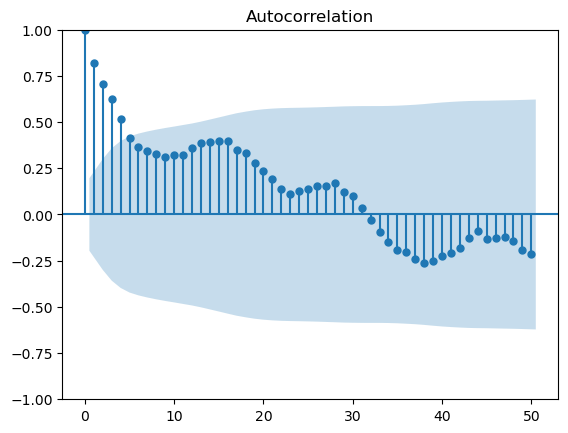

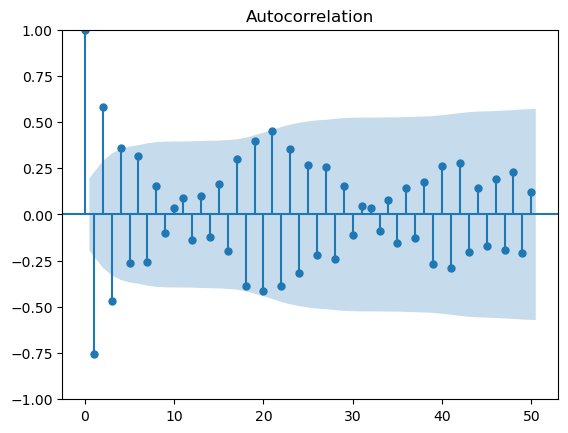

In [54]:
plt.figure(figsize = (10, 5))
plot_acf(z1, lags=50)
plot_acf(z2, lags=50)
plt.show()

**5) Сравните эти графики между собой: укажите их сходства и различия, 
а также характерные особенности, которые позволяют отнести их к 
модели АР первого порядка.**

Наиболее высоким коэффициентом автокорреляции оказался p(1), то есть первый порядок, что означает о присутствии тренда в обоих ВР. 

Оба графика с ростом лага затухают, однако первый график делает это постепенно, в этом можно убедиться, посмотрев на последующие порядки(2, 3, и т.д., то есть с ростом лага коэффициент автокореляции уменьшается), в отличие от второго, который затухает знакопеременно.

В самом деле, после 1-го порядка наибольшим идёт 2-й порядок с положительным коэффициентом, затем 3-й порядок снова отрицательный и так на протяжении всего графика. 

**6 задание**

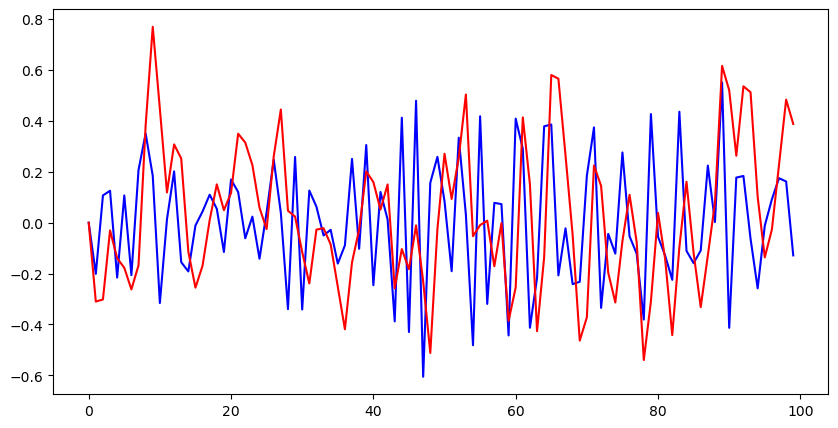

In [55]:
z3 = np.zeros(100)
z4 = np.zeros(100)
ar = 0.2 * np.random.randn(100)
for i in range(1, 100):
 z3[i] = ar[i] - 0.8 * ar[i - 1]
 z4[i] = ar[i] + 0.8 * ar[i - 1]
plt.figure(figsize = (10, 5))
plt.plot(z3, 'b')
plt.plot(z4, 'r')
plt.show()

**7-8 задание**

<Figure size 1000x500 with 0 Axes>

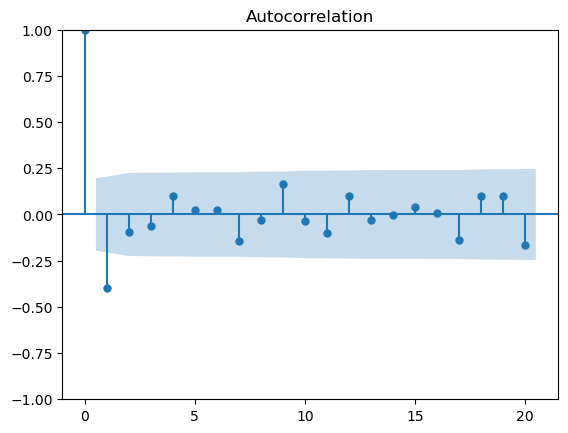

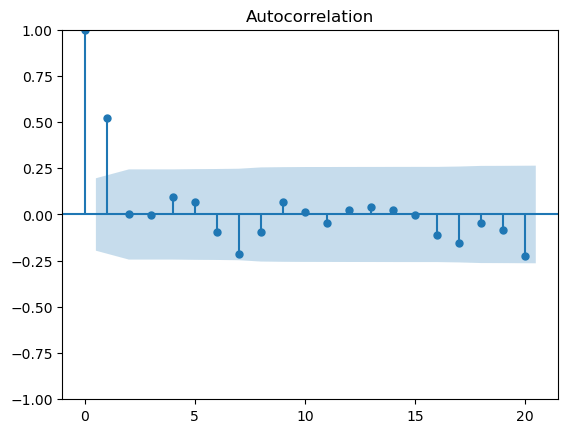

In [56]:
plt.figure(figsize = (10, 5))
plot_acf(z3, lags=20)
plot_acf(z4, lags=20)
plt.show()

Оба графика имеют наибольшее значение коэффициента автокорреляции при порядке 1, следовательно у них наблюдается тренд.

При дальнейшем визуальном осмотре можно выделить следующее:
1. На обоих графиках наблюдается затухающая знакопеременность
2. На первом графике знакопеременность чередуется через 1 точку, на втором же графике при визуальном осмотре похоже на синусоидную знакопеременность.

**10 задание**

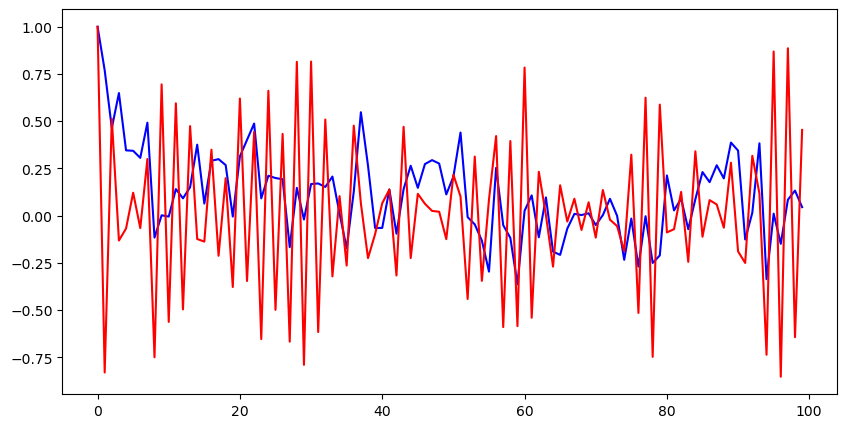

In [57]:
z5 = np.zeros(100)
z6 = np.zeros(100)
z5[0], z6[0] = 1, 1
a = 0.2 * np.random.randn(100)
for i in range(1, len(z5)):
    z5[i] = 0.8 * z5[i-1] + a[i] - 0.3 * a[i-1]
    z6[i] = -0.8 * z6[i-1] + a[i] - 0.3 * a[i-1]

plt.figure(figsize = (10, 5))
plt.plot(z5, 'b')
plt.plot(z6, 'r')
plt.show()

<Figure size 1000x500 with 0 Axes>

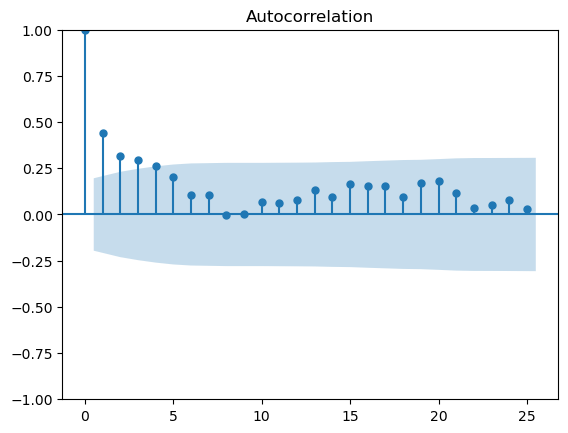

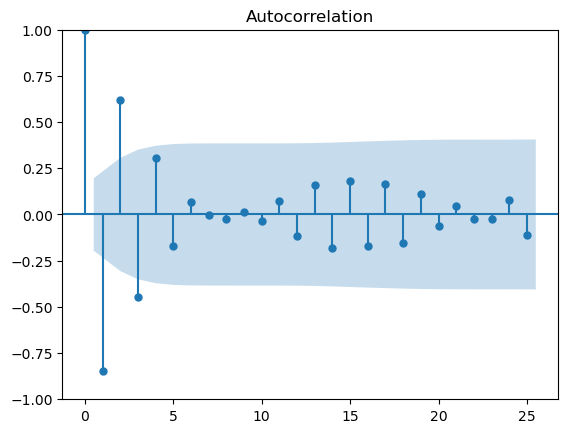

In [58]:
plt.figure(figsize = (10, 5))
plot_acf(z5, lags=len(z5)/4)
plot_acf(z6, lags=len(z5)/4)
plt.show()

**11 задание**

In [59]:
from statsmodels.tsa.arima_process import arma_generate_sample
ar = np.array([0.75, -0.25]) # задаем коэффициенты АР
ma = np.array([0.65, 0.35]) # задаем коэффициенты СС 
y = arma_generate_sample(np.r_[1, -ar], np.r_[1, ma], 100)
# создаем ВР для АРСС (2, 2) = АРПСС (2, 0, 2) из 100 отсчетов

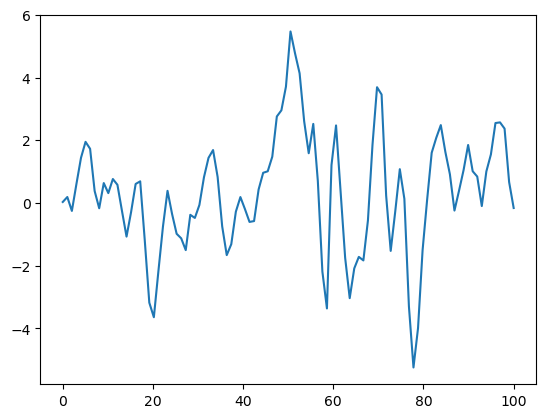

In [60]:
t = np.linspace(0, 100, 100)
plt.plot(t, y)

<Figure size 1000x500 with 0 Axes>

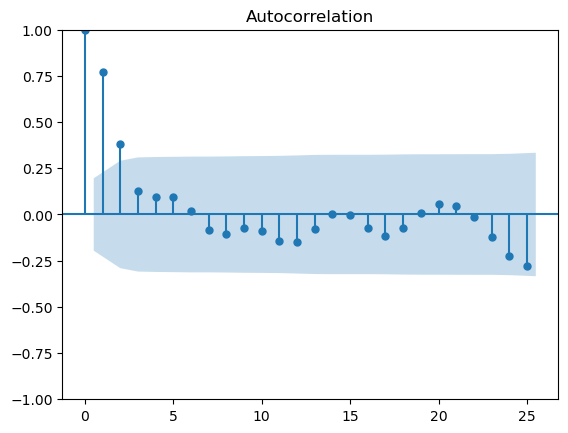

In [61]:
plt.figure(figsize = (10, 5))
plot_acf(y, lags=len(y)/4)
plt.show()

По графику можно заметить, что наша АРСС принадлежит к классу моделей некоторого порядка, поскольку у нас отсутствует спадающее значение коэффициентов коррелограммы от лага, а наоборот заметна цикличность в данных.

In [62]:
stt.arma_order_select_ic(y)

{'bic':             0           1           2
 0  418.723811  337.454232  298.370319
 1  332.813874  302.976219  294.775739
 2  302.094226  299.096953  297.647457
 3  294.278489  298.796862  297.348912
 4  298.678367  300.462188  300.469824,
 'bic_min_order': (3, 0)}

**13 задание**

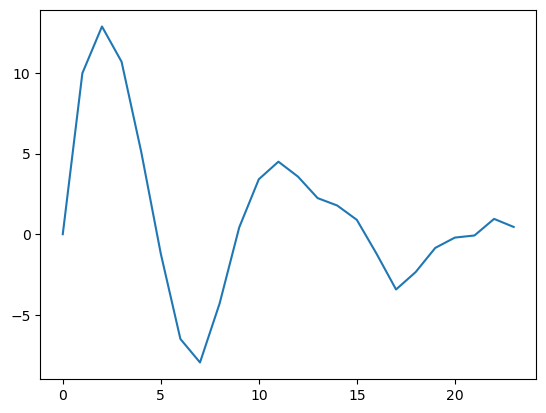

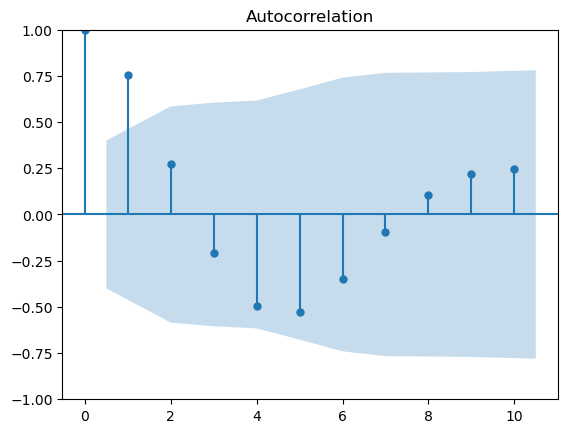

In [63]:
TEST = np.array([0.00, 9.99, 12.89, 10.70, 5.12, -1.21, -6.50, -7.96, -4.30, 0.42, 3.41, 
4.50, 3.57, 2.24, 1.78, 0.89, -1.20, -3.43, -2.35, -0.85, -0.21, -0.08, 0.95, 
0.45])

plt.plot(TEST)
plot_acf(TEST, lags = 10)
plt.show()


**15 задание**

In [64]:
arima1 = ARIMA(TEST, order = (1, 0, 0)) # создаем модель
model_fit1 = arima1.fit() # подгоняем под ВР
print(model_fit1.summary()) # выводим таблицу результатов
arima2 = ARIMA(TEST, order = (2, 0, 0))
model_fit2 = arima2.fit()
print(model_fit2.summary())
arima3 = ARIMA(TEST, order = (3, 0, 0))
model_fit3 = arima3.fit()
print(model_fit3.summary())


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   24
Model:                 ARIMA(1, 0, 0)   Log Likelihood                 -62.321
Date:                Thu, 04 Apr 2024   AIC                            130.642
Time:                        23:09:07   BIC                            134.177
Sample:                             0   HQIC                           131.580
                                 - 24                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0213      2.697      0.379      0.705      -4.264       6.307
ar.L1          0.7298      0.140      5.208      0.000       0.455       1.004
sigma2        10.2148      2.369      4.312      0.0

**22-23 задание**

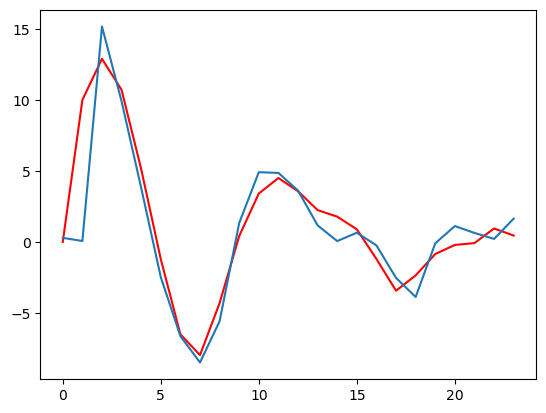

In [65]:
plt.plot(TEST, c = 'red')
plt.plot(model_fit2.fittedvalues)

In [66]:
import statsmodels.tsa.stattools as stt
stt.arma_order_select_ic(TEST)


{'bic':             0           1           2
 0  150.571083  129.219818  115.838488
 1  134.176597  120.042236  114.610652
 2   95.542899   96.955118   99.573675
 3   97.981298  100.050982  102.693659
 4   98.176969  103.926910  100.497398,
 'bic_min_order': (2, 0)}

**24 задание**

In [67]:
file = h5py.File('Data/10.mat', 'r') 
data = file.get('z10') 
Z = np.array(data)
Z = Z.ravel()

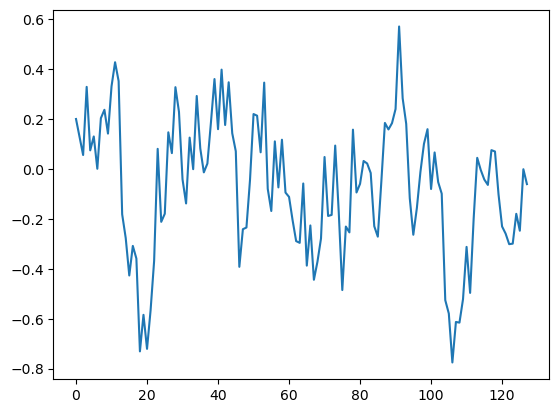

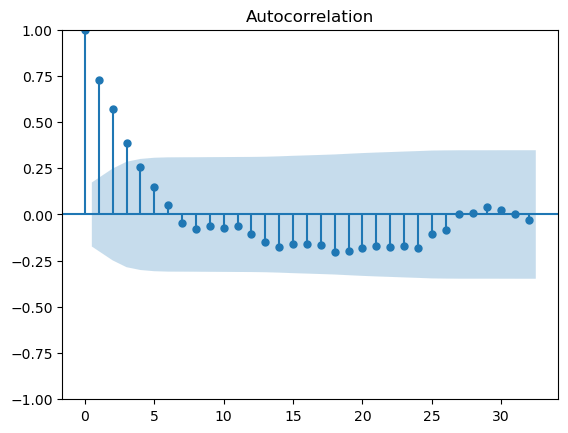

In [68]:
plt.plot(Z)
plot_acf(Z, lags = len(Z)/4)
plt.show()

**27 задание**

AR(0), MA(0)
bic - 36.31419483313566, aic - 30.610134305296427
АРКФ - [], ССКФ - []


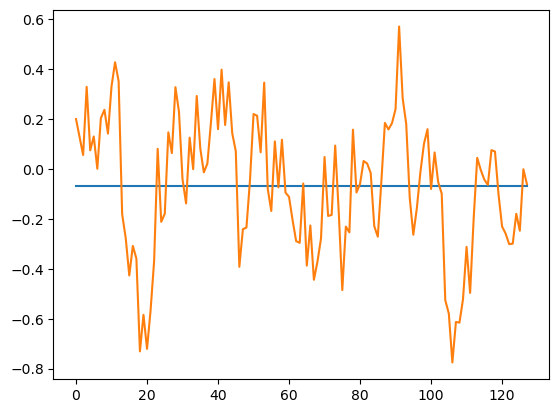

AR(0), MA(1)
bic - -13.866470661324737, aic - -22.42256145308359
АРКФ - [], ССКФ - [0.5208799]


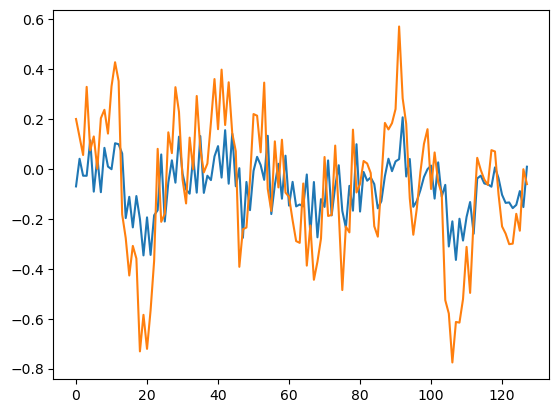

AR(1), MA(0)
bic - -55.18493440692933, aic - -63.74102519868818
АРКФ - [0.72644356], ССКФ - []


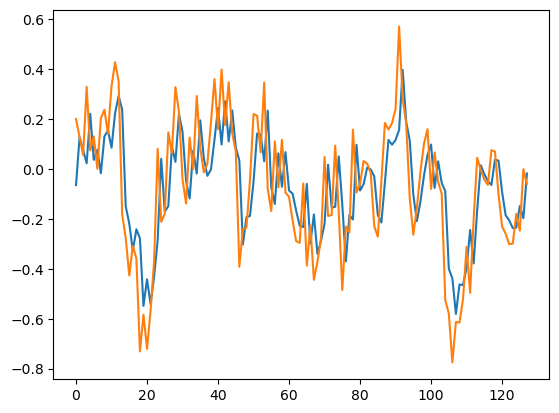

AR(1), MA(1)
bic - -51.20723405126296, aic - -62.61535510694142
АРКФ - [0.77191338], ССКФ - [-0.09642865]


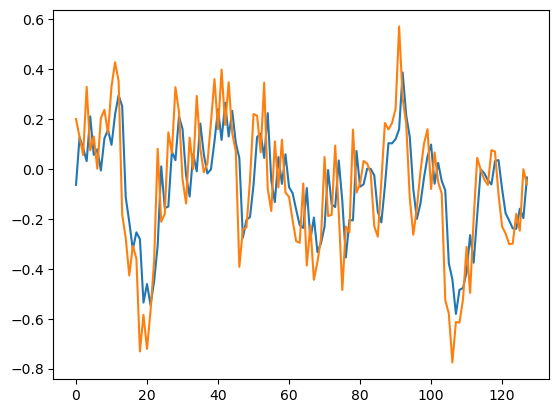

AR(2), MA(0)
bic - -51.52879248303343, aic - -62.93691353871189
АРКФ - [0.65582207 0.09623364], ССКФ - []


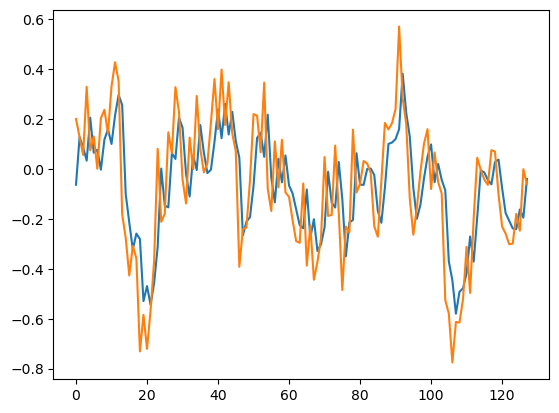

AR(2), MA(1)
bic - -47.98063119823519, aic - -62.24078251783327
АРКФ - [0.09388677 0.51421878], ССКФ - [0.55921718]


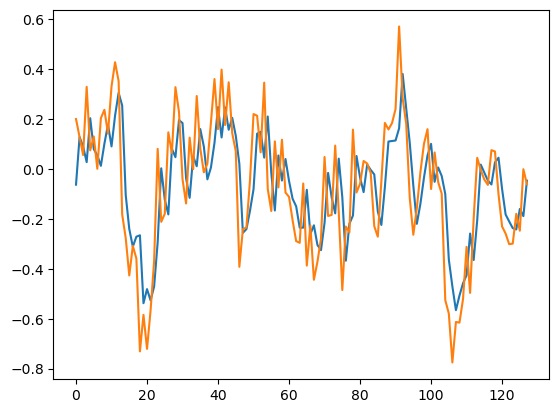

AR(3), MA(0)
bic - -48.82934977382388, aic - -63.08950109342196
АРКФ - [ 0.66864864  0.18168443 -0.12892415], ССКФ - []


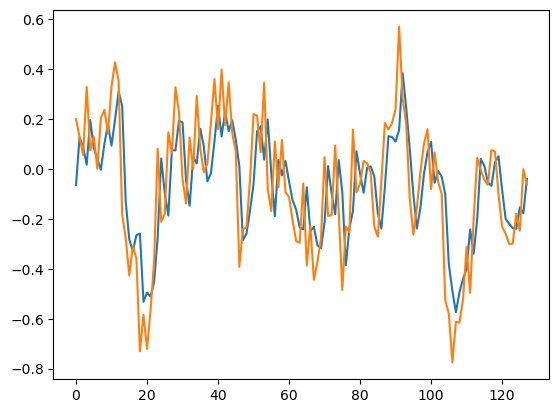

AR(3), MA(1)
bic - -45.95035327807434, aic - -63.06253486159204
АРКФ - [ 1.60994288 -0.48929355 -0.14627131], ССКФ - [-0.99729805]


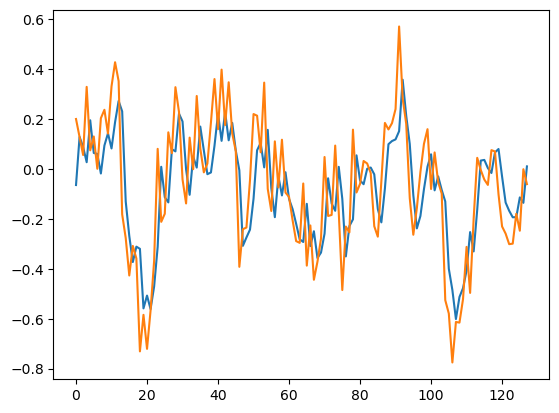

In [69]:
def Arima(x, order):
    arima = ARIMA(x, order = order) # создаем модель
    model_fit = arima.fit() # подгоняем под ВР
    return model_fit

for i in range(4):
    for j in range(2):
        a = Arima(Z, (i, 0, j)) # выводим таблицу результатов
        print(f'AR({i}), MA({j})')
        print(f'bic - {a.bic}, aic - {a.aic}')
        print(f'АРКФ - {a.arparams}, ССКФ - {a.maparams}')
        plt.plot(a.fittedvalues)
        plt.plot(Z)
        plt.show()

Среди всех моделей, нас устроит модель ARMA(1, 0): BIC-критерий равен -55, AIC-критерий равен -63. Критерий BIC является самым наименьшим средих других порядков, кроме этого, при взгляде на получившиеся графики также можно убедиться в правильном выборе модели. Модели с более высоким порядком будут отвергнуты по причине избыточности параметров.

**28 задание**

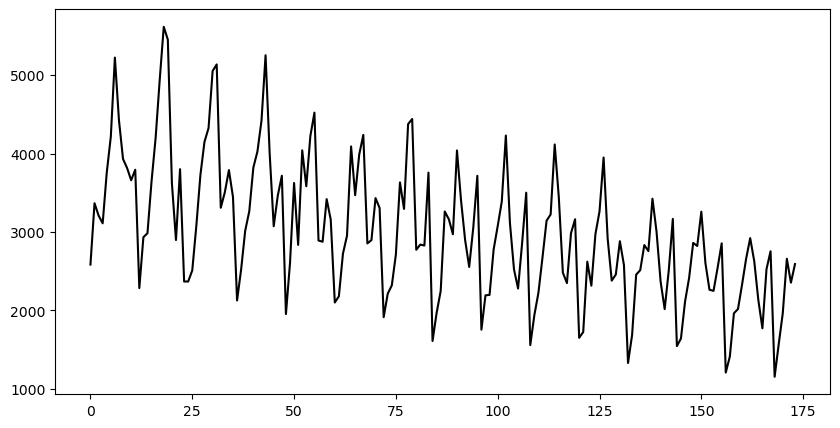

In [70]:
file = h5py.File('Data/Fort.mat', 'r') 
data = file.get('Fort') 
Fort = np.array(data)
Fort = Fort.ravel()
plt.figure(figsize = (10, 5))
plt.plot(Fort, 'k')
plt.show()


**29 задание**

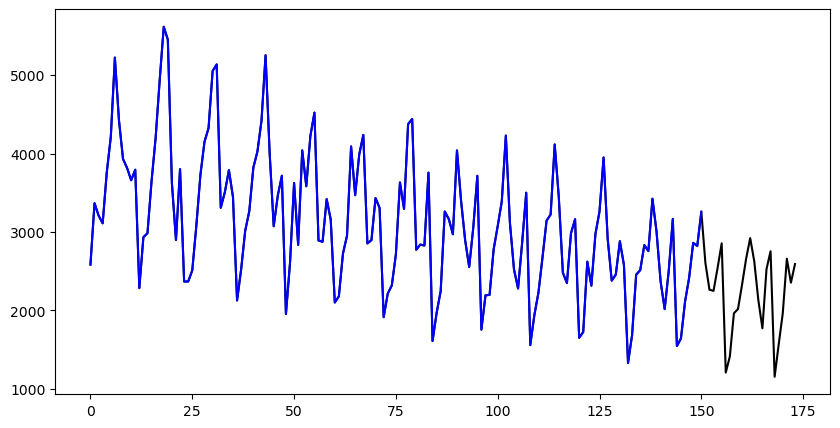

In [71]:
F = Fort[:len(Fort)-24+1] # отрезаем последние 24 точки
plt.figure(figsize = (10, 5))
plt.plot(Fort, 'k') # исходный ВР
plt.plot(F, 'b') # урезанный ряд
plt.show()


**30-31 задание**

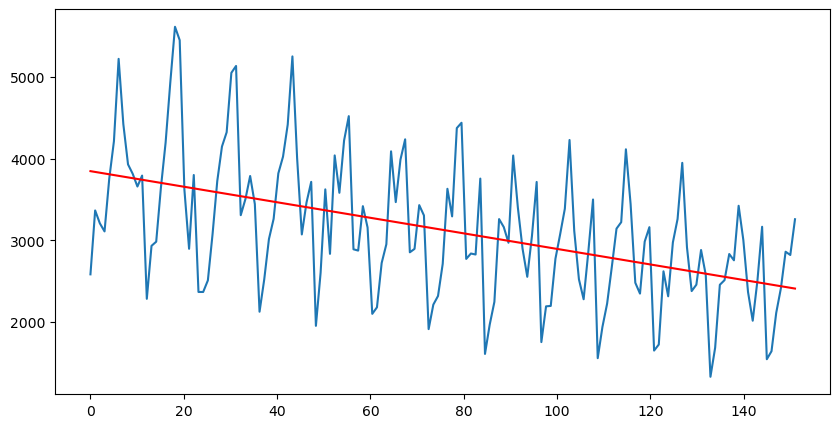

In [72]:
tf = np.linspace(0, len(F), len(F))
mod1 = np.polyfit(tf, F, 1)
plt.figure(figsize = (10, 5))
plt.plot(tf, F)
plt.plot(tf, mod1[0] * tf + mod1[1], c = 'r')

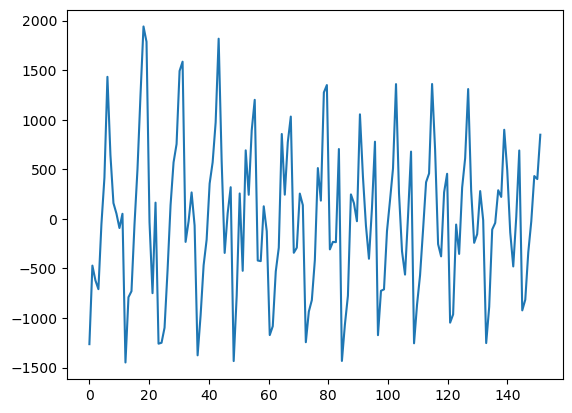

In [73]:
new_f = F - (mod1[0] * tf + mod1[1])
plt.plot(tf, new_f)

**32 задание**

In [74]:
from statsmodels.tsa.tsatools import detrend
F_minus_trend = detrend(F)

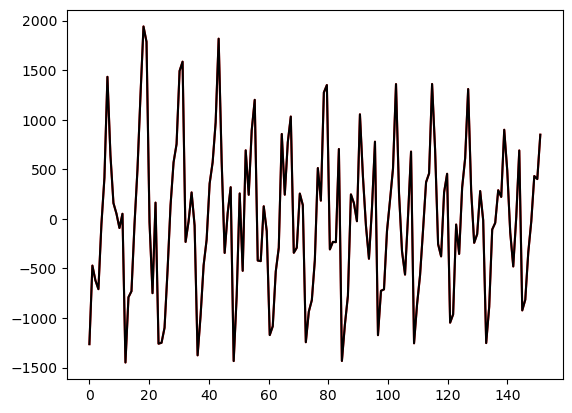

In [75]:
plt.plot(tf, F_minus_trend, c = 'red')
plt.plot(tf, new_f, c = 'k')
plt.show()

При наложении графика из пункта 30 на график из пункта 31 можно увидеть, что они идентичны.

In [76]:
print(np.mean(F_minus_trend), np.mean(new_f))

-8.673326957304746e-13 -1.6262488044946399e-13


**33 задание**

In [77]:
stt.arma_order_select_ic(F_minus_trend)

{'bic':              0            1            2
 0  2438.335923  2400.148833  2403.810183
 1  2402.850379  2403.493174  2408.506306
 2  2403.347221  2379.964332  2410.742315
 3  2408.252526  2410.432244  2387.422565
 4  2406.764395  2368.185662  2383.219146,
 'bic_min_order': (4, 1)}

In [89]:
#Функция, которая перебирает модель ARIMA(p, d, q) и выбирает лучшую модель по критерию bic
def param(x):
    arr = []
    for i in range(1, 4):
        for j in range(1, 4):
            for m in range(1, 4):
                arimaz = ARIMA(x, order = (i, j, m))
                model = arimaz.fit()
                arr.append(model)
    
    min_bic = 9000000
    for i in arr:
        if i.bic < min_bic:
            min_bic = i.bic
            mod = i
    
    return mod

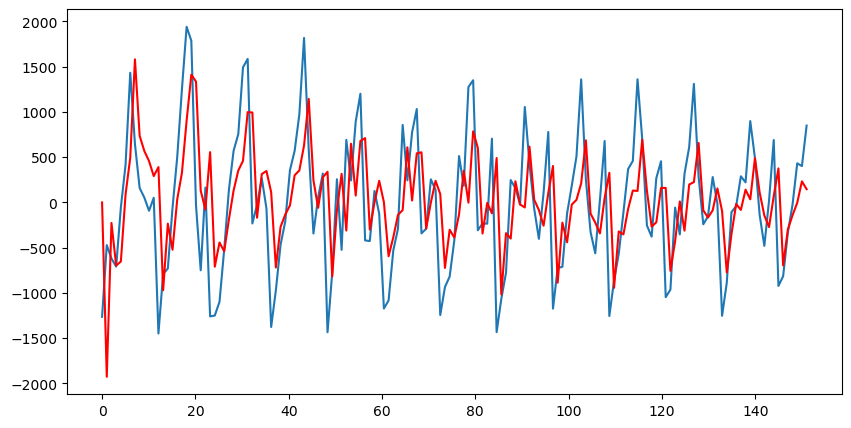

In [90]:
t = np.linspace(0, len(F_minus_trend), len(F_minus_trend))
plt.figure(figsize = (10, 5))
plt.plot(t, F_minus_trend)
plt.plot(t, param(F_minus_trend).predict(0, len(F_minus_trend)-1), c = 'red')
plt.show()

**36-37 задание**

In [80]:
model = param(F)
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  151
Model:                 ARIMA(3, 1, 3)   Log Likelihood               -1178.209
Date:                Thu, 04 Apr 2024   AIC                           2370.419
Time:                        23:09:23   BIC                           2391.493
Sample:                             0   HQIC                          2378.980
                                - 151                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6089      0.254      2.398      0.016       0.111       1.106
ar.L2          0.4409      0.359      1.227      0.220      -0.263       1.145
ar.L3         -0.4860      0.187     -2.598      0.0

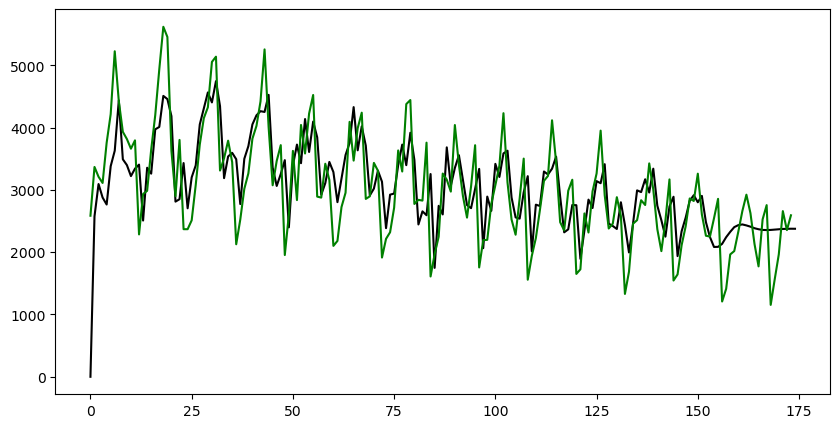

In [88]:
plt.figure(figsize = (10, 5))
plt.plot(model.predict(0, len(Fort)), 'k')
plt.plot(Fort, 'g')
plt.show()


**40 задание**

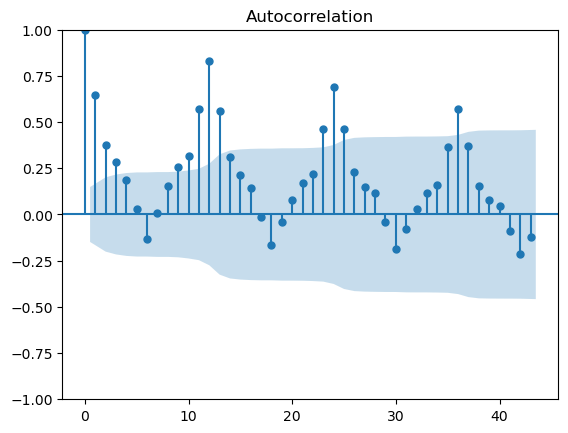

In [82]:
plot_acf(Fort, lags = len(Fort)/4)
plt.show()

In [83]:
from statsmodels.tsa.forecasting.theta import ThetaModel
tm = ThetaModel(F, period=12)
res = tm.fit()
print(res.summary())

                              ThetaModel Results                              
Dep. Variable:                  endog   No. Observations:                  151
Method:                       OLS/SES   Deseasonalized:                   True
Date:                Thu, 04 Apr 2024   Deseas. Method:         Multiplicative
Time:                        23:09:23   Period:                             12
Sample:                             0                                         
                                  151                                         
   Parameter Estimates   
           Parameters    
-------------------------
b0    -10.319688827255952
alpha 0.18562889811701097
-------------------------


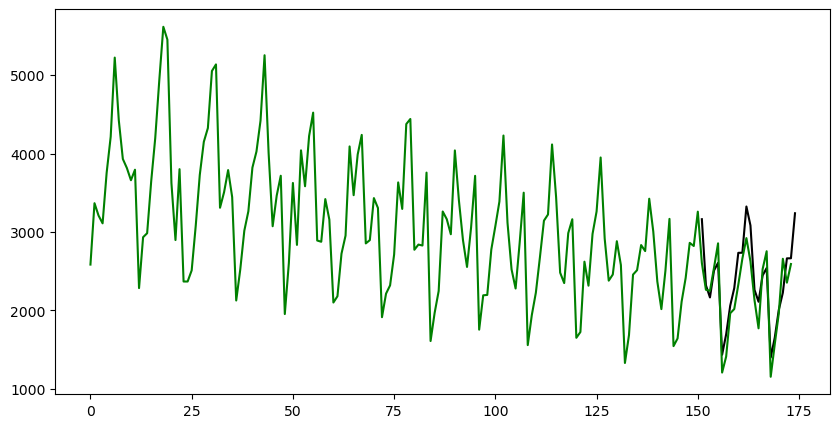

In [84]:
plt.figure(figsize = (10, 5))
plt.plot(res.forecast(24), 'k')
plt.plot(Fort, 'g')
plt.show()

#### Параметр period подбирался по АКФ ВР Fort, на его основании можно выделить цикл с периодом в 12

**43 задание**

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  151
Model:               SARIMAX(3, 1, 3)   Log Likelihood               -1189.142
Date:                Thu, 04 Apr 2024   AIC                           2396.284
Time:                        23:09:24   BIC                           2423.379
Sample:                             0   HQIC                          2407.292
                                - 151                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    -51.5756     55.179     -0.935      0.350    -159.725      56.574
drift          0.4275      0.517      0.828      0.408      -0.585       1.440
ar.L1         -0.8674      0.120     -7.208      0.0

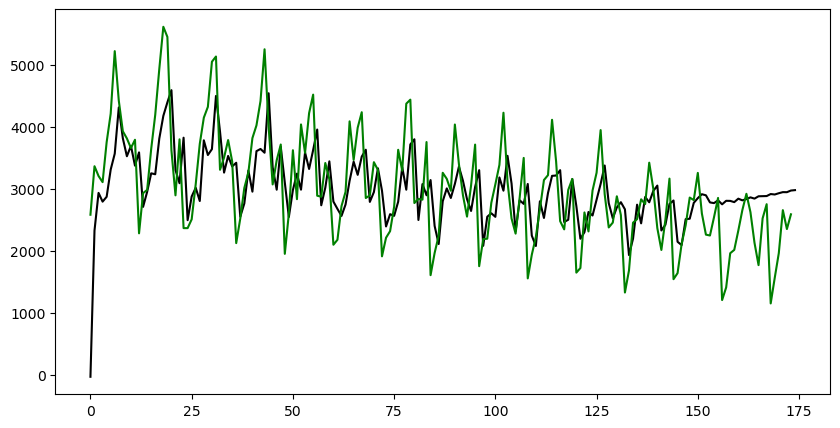

In [85]:
from statsmodels.tsa.api import SARIMAX
sarimax_mod = SARIMAX(F, order=(3, 1, 3), trend='ct')
sarimax_res = sarimax_mod.fit()
print(sarimax_res.summary())
plt.figure(figsize = (10, 5))
plt.plot(sarimax_res.predict(0, len(Fort)), 'k')
plt.plot(Fort, 'g')
plt.show()


Выбрали ту же модель, что и в пункте 36

**44 задание**

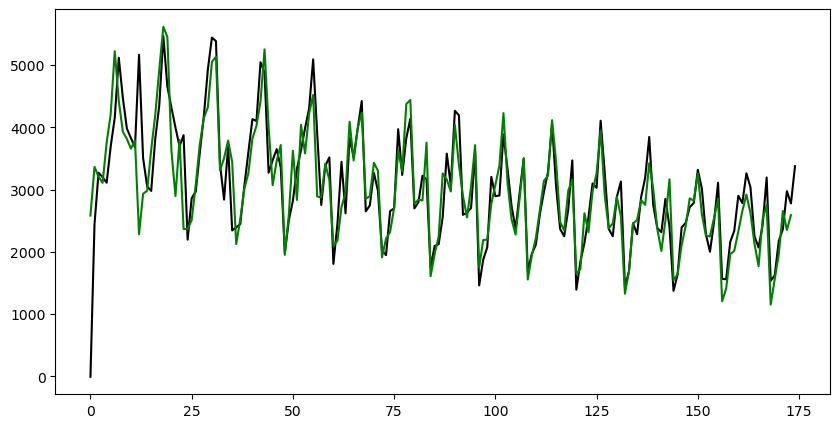

In [86]:
mod = SARIMAX(F, order=(3, 1, 3), seasonal_order=(0, 1, 0, 12), trend='ct')
mres = mod.fit()
mres.summary()
plt.figure(figsize = (10, 5))
plt.plot(mres.predict(0, len(Fort)), 'k')
plt.plot(Fort, 'g')
plt.show()


Параметры ARIMA были выбраны из пункта 36, параметры сезонности были выбраны следующие: (0, 1, 0, 12). Поскольку один и тот же ВР, то и параметр period снова остался равен 12.